In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import ttest_ind
import seaborn as sns

from src.config import DADOS_ORIGINAIS, DADOS_TRATADOS
from src.graficos import PALETTE, SCATTER_ALPHA, plot_correl_matrix

sns.set_theme(palette='bright')

In [2]:
# Carregamento da base de dados
data = DADOS_ORIGINAIS

df = pd.read_csv(data)
df.head(3)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [3]:
# Reordenação das colunas
df = df.reindex(sorted(df.columns), axis=1)

# Informações da base de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   area_mean                569 non-null    float64
 1   area_se                  569 non-null    float64
 2   area_worst               569 non-null    float64
 3   compactness_mean         569 non-null    float64
 4   compactness_se           569 non-null    float64
 5   compactness_worst        569 non-null    float64
 6   concave points_mean      569 non-null    float64
 7   concave points_se        569 non-null    float64
 8   concave points_worst     569 non-null    float64
 9   concavity_mean           569 non-null    float64
 10  concavity_se             569 non-null    float64
 11  concavity_worst          569 non-null    float64
 12  diagnosis                569 non-null    object 
 13  fractal_dimension_mean   569 non-null    float64
 14  fractal_dimension_se     5

In [4]:
# Remoção da coluna 'id'
df = df.drop(columns=['id'])

# Seleção das colunas numéricas
col_num = df.drop(columns=['diagnosis']).columns

# Downcast das colunas float
df[col_num] = df[col_num].apply(pd.to_numeric, downcast='float')

# Conversão da colunas target em categórica
df['diagnosis'] = df['diagnosis'].astype('category')

# Resultado
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   area_mean                569 non-null    float32 
 1   area_se                  569 non-null    float32 
 2   area_worst               569 non-null    float32 
 3   compactness_mean         569 non-null    float32 
 4   compactness_se           569 non-null    float32 
 5   compactness_worst        569 non-null    float32 
 6   concave points_mean      569 non-null    float32 
 7   concave points_se        569 non-null    float32 
 8   concave points_worst     569 non-null    float32 
 9   concavity_mean           569 non-null    float32 
 10  concavity_se             569 non-null    float32 
 11  concavity_worst          569 non-null    float32 
 12  diagnosis                569 non-null    category
 13  fractal_dimension_mean   569 non-null    float32 
 14  fractal_di

In [5]:
# Descrição estatística das variáveis
df.describe()

,area_mean,area_se,area_worst,compactness_mean,compactness_se,compactness_worst,concave points_mean,concave points_se,concave points_worst,concavity_mean,...,radius_worst,smoothness_mean,smoothness_se,smoothness_worst,symmetry_mean,symmetry_se,symmetry_worst,texture_mean,texture_se,texture_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,654.889038,40.337082,880.583130,0.104341,0.025478,0.254265,0.048919,0.011796,0.114606,0.088799,...,16.269192,0.096360,0.007041,0.132369,0.181162,0.020542,0.290076,19.289650,1.216853,25.677223
std,351.914093,45.491009,569.356873,0.052813,0.017908,0.157337,0.038803,0.006170,0.065732,0.079720,...,4.833241,0.014064,0.003003,0.022832,0.027414,0.008266,0.061867,4.301038,0.551648,6.146256
min,143.500000,6.802000,185.199997,0.019380,0.002252,0.027290,0.000000,0.000000,0.000000,0.000000,...,7.930000,0.052630,0.001713,0.071170,0.106000,0.007882,0.156500,9.710000,0.360200,12.020000
25%,420.299988,17.850000,515.299988,0.064920,0.013080,0.147200,0.020310,0.007638,0.064930,0.029560,...,13.010000,0.086370,0.005169,0.116600,0.161900,0.015160,0.250400,16.170000,0.833900,21.080000
50%,551.099976,24.530001,686.500000,0.092630,0.020450,0.211900,0.033500,0.010930,0.099930,0.061540,...,14.970000,0.095870,0.006380,0.131300,0.179200,0.018730,0.282200,18.840000,1.108000,25.410000
75%,782.700012,45.189999,1084.000000,0.130400,0.032450,0.339100,0.074000,0.014710,0.161400,0.130700,...,18.790001,0.105300,0.008146,0.146000,0.195700,0.023480,0.317900,21.799999,1.474000,29.719999
max,2501.000000,542.200012,4254.000000,0.345400,0.135400,1.058000,0.201200,0.052790,0.291000,0.426800,...,36.040001,0.163400,0.031130,0.222600,0.304000,0.078950,0.663800,39.279999,4.885000,49.540001


In [6]:
# Definição da variável target
target = 'diagnosis'

# Descrição estatística do target
df[target].value_counts(normalize=True)

diagnosis
B    0.627417
M    0.372583
Name: proportion, dtype: float64

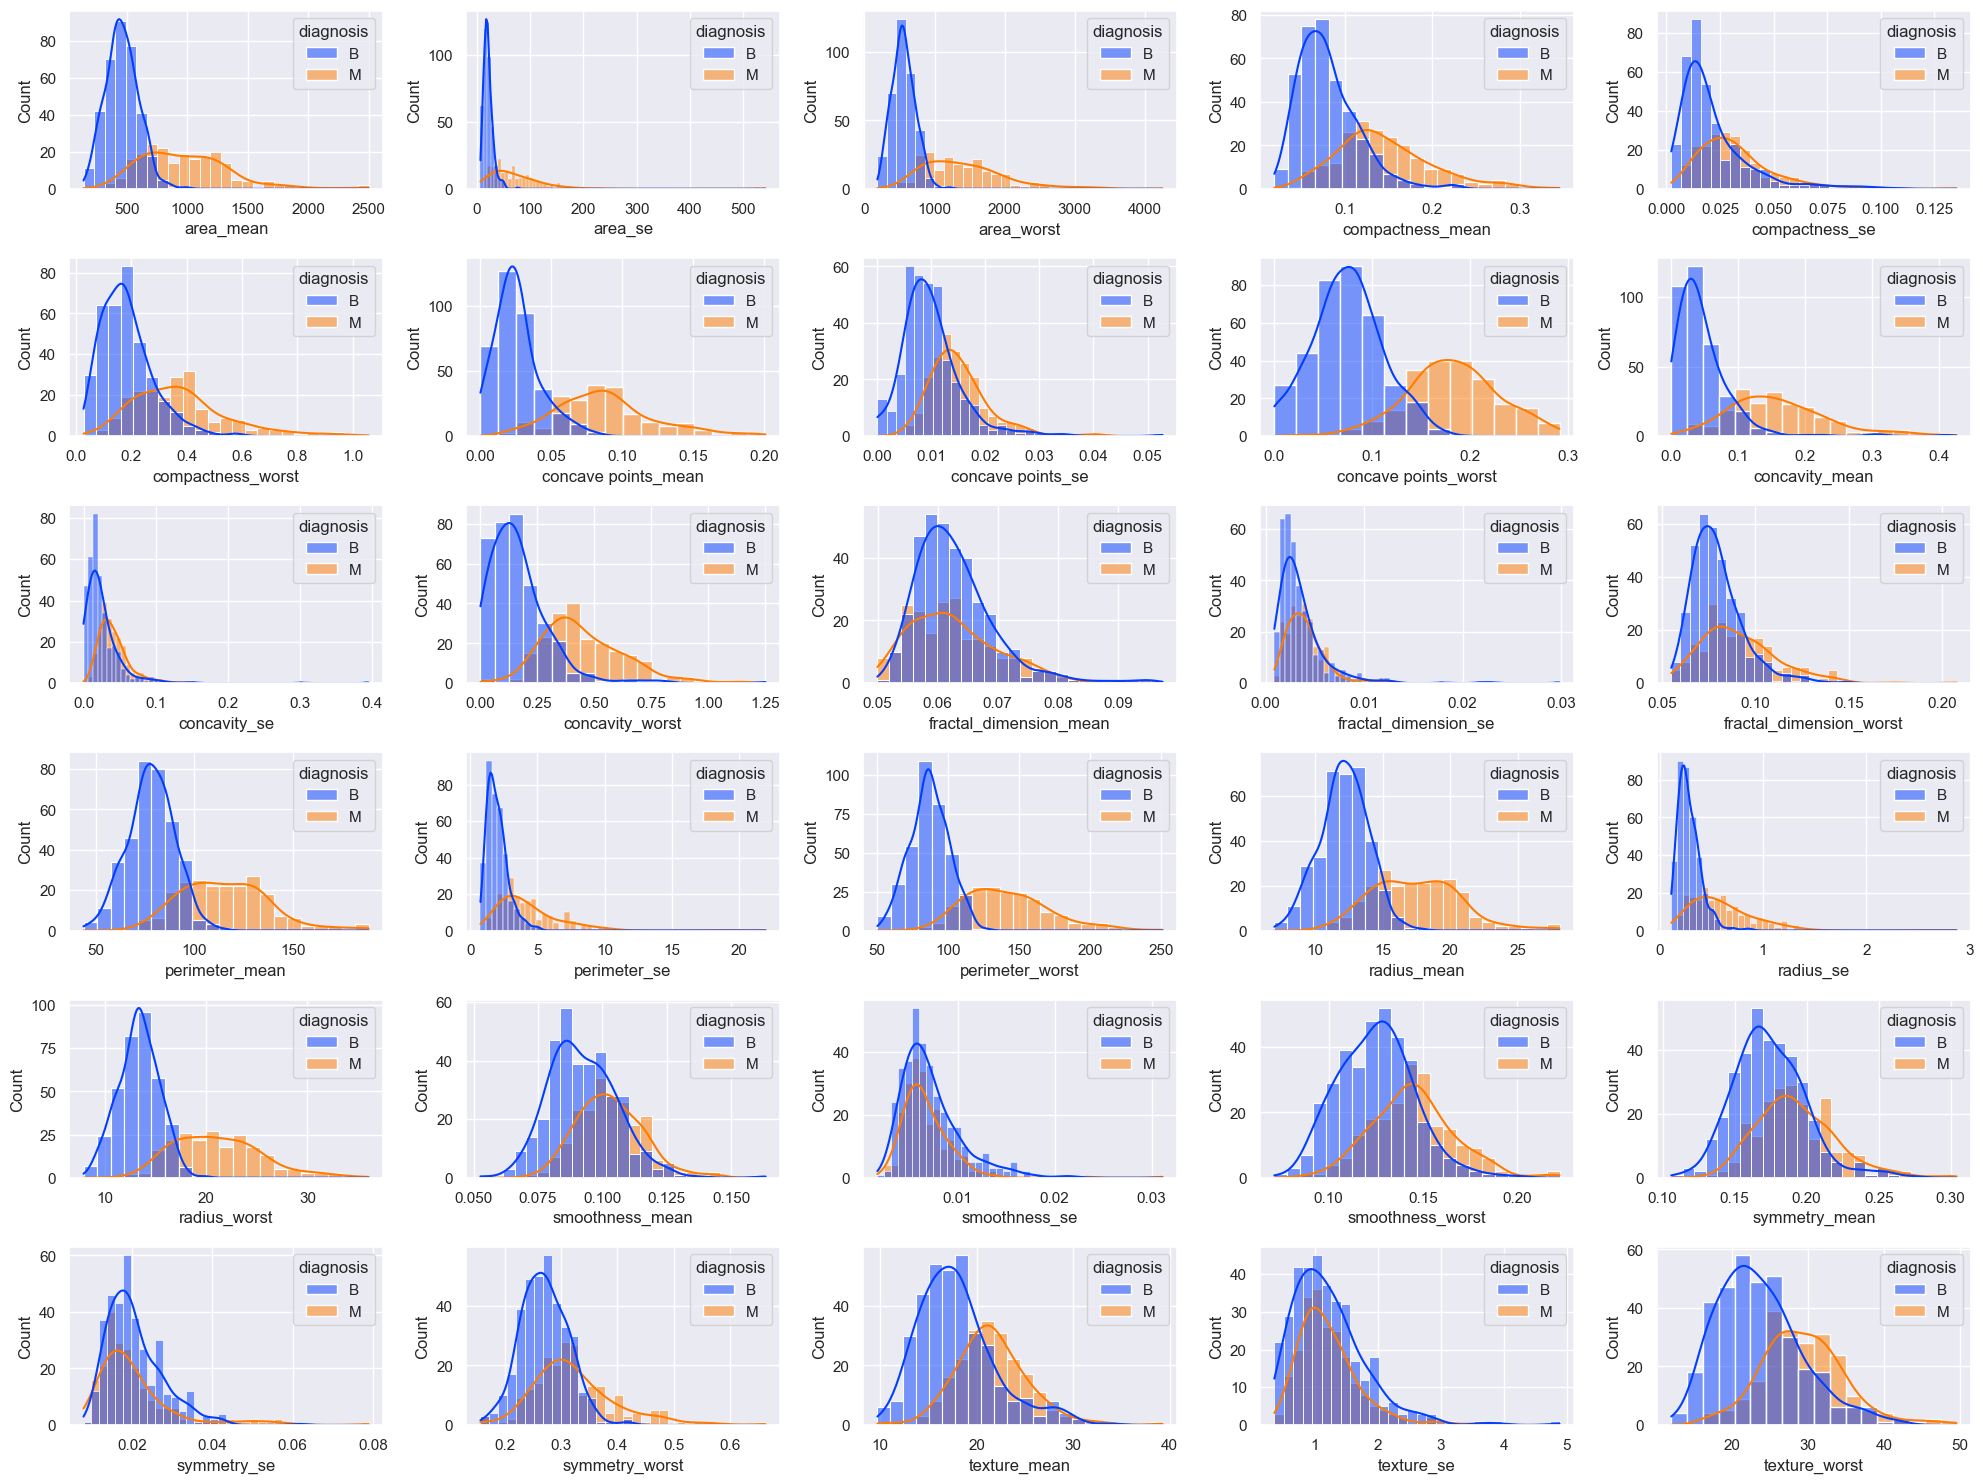

In [7]:
# Visualização da distribuição das variáveis
fig, axes = plt.subplots(nrows=6, ncols=5, figsize=(20, 15))
axes = axes.flatten()

for i, col in enumerate(df[col_num]):
    sns.histplot(data=df, x=col, ax=axes[i], kde=True, hue='diagnosis')


plt.tight_layout()
plt.show()

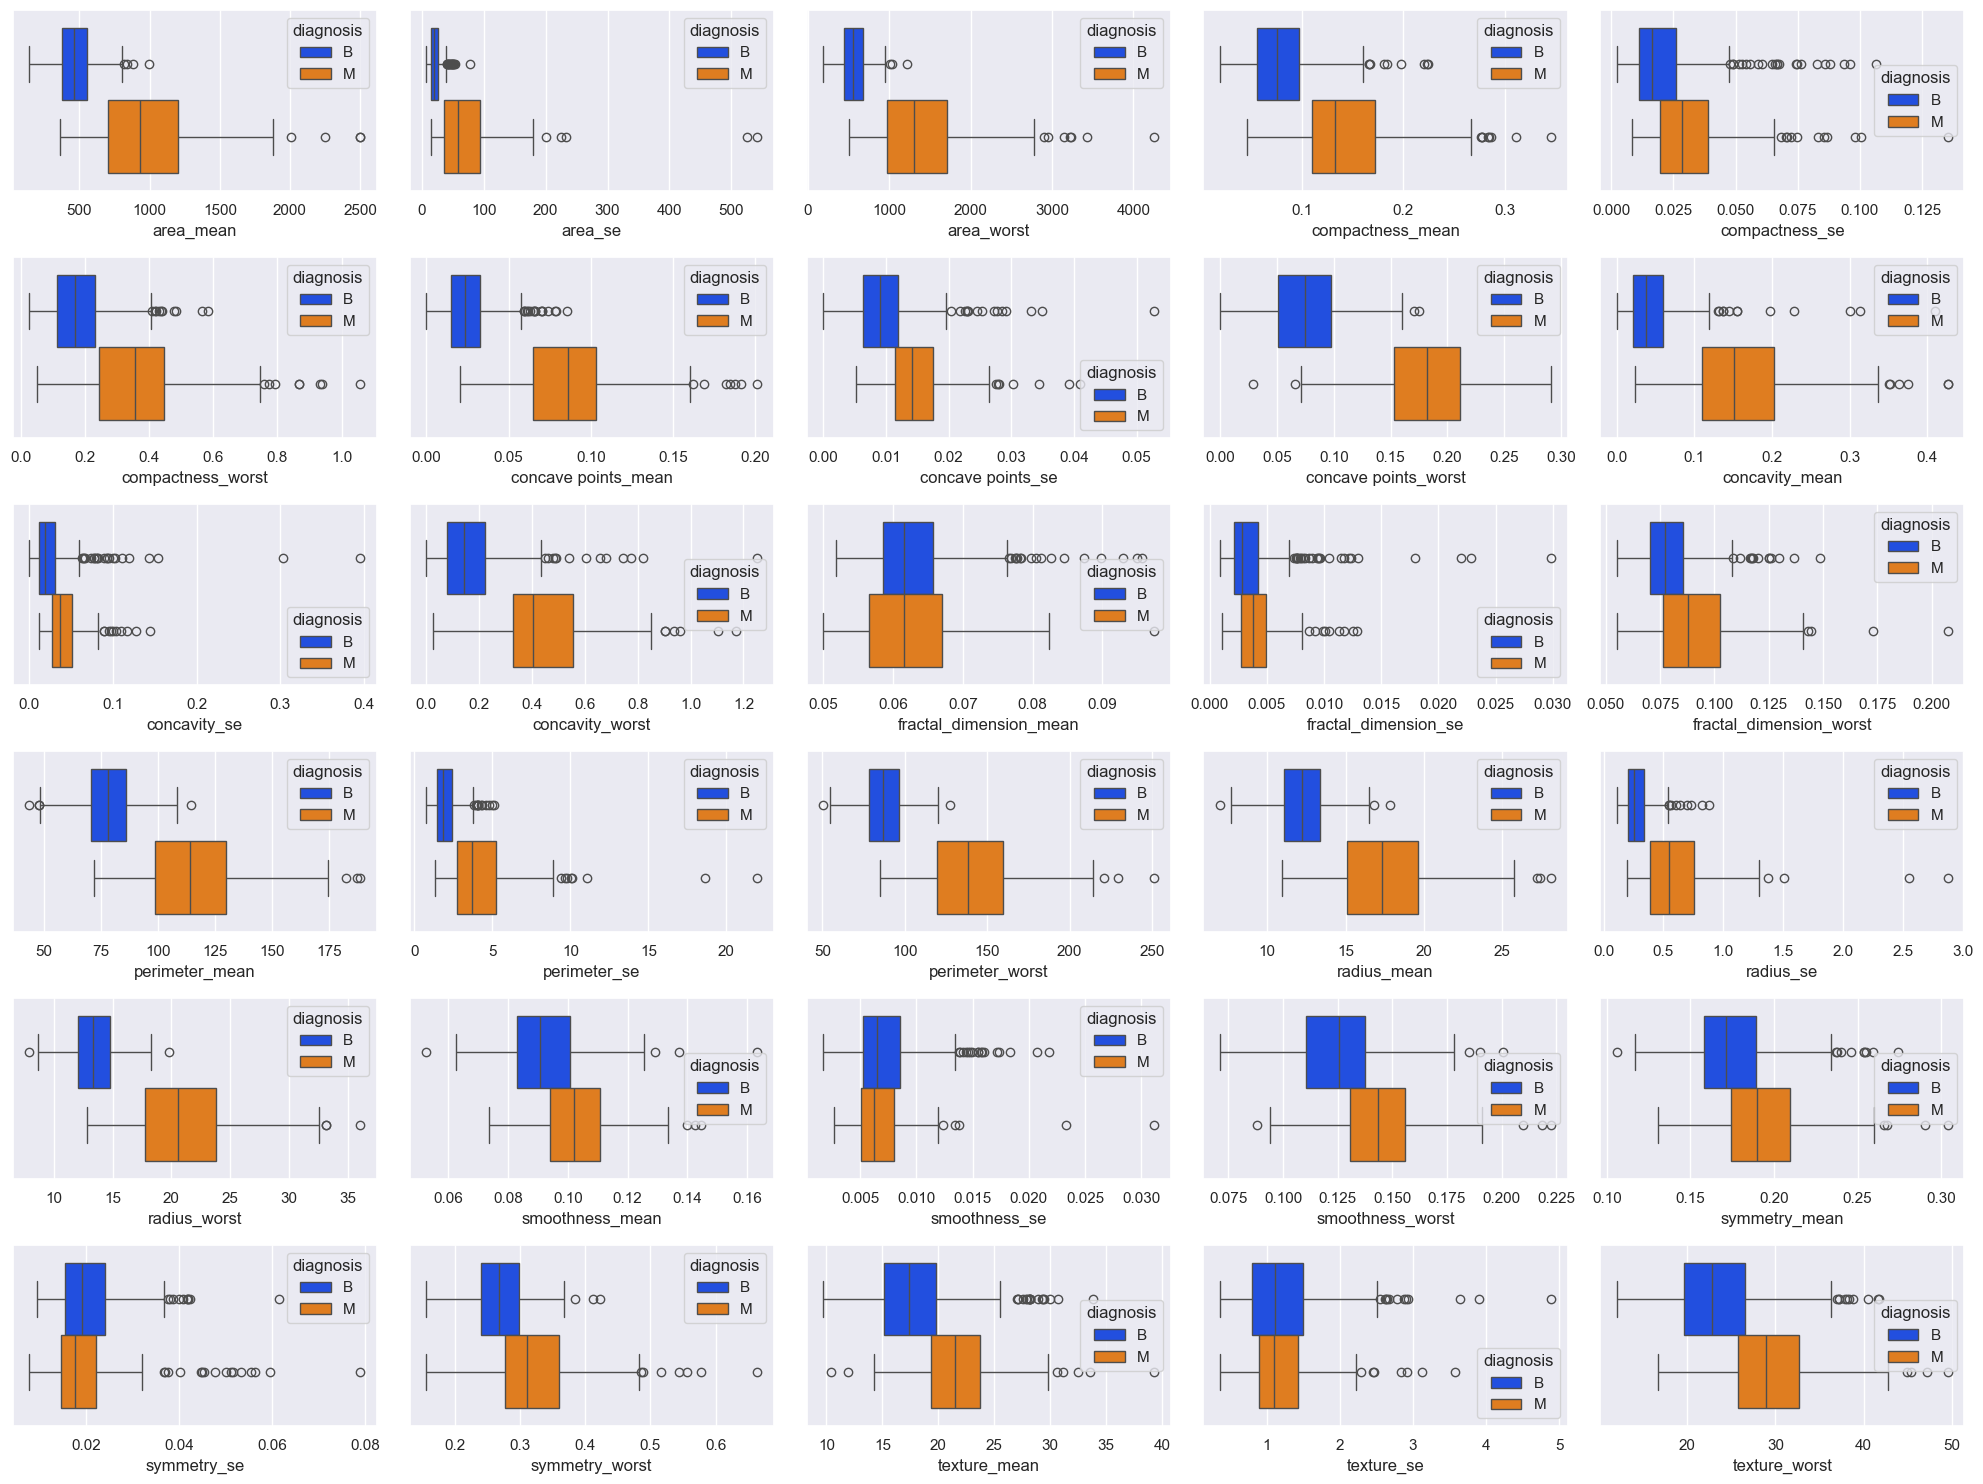

In [8]:
# Visualização da distribuição das variáveis
fig, axes = plt.subplots(nrows=6, ncols=5, figsize=(20, 15))
axes = axes.flatten()

for i, col in enumerate(df[col_num]):
    sns.boxplot(data=df, x=col, ax=axes[i], hue='diagnosis')


plt.tight_layout()
plt.show()

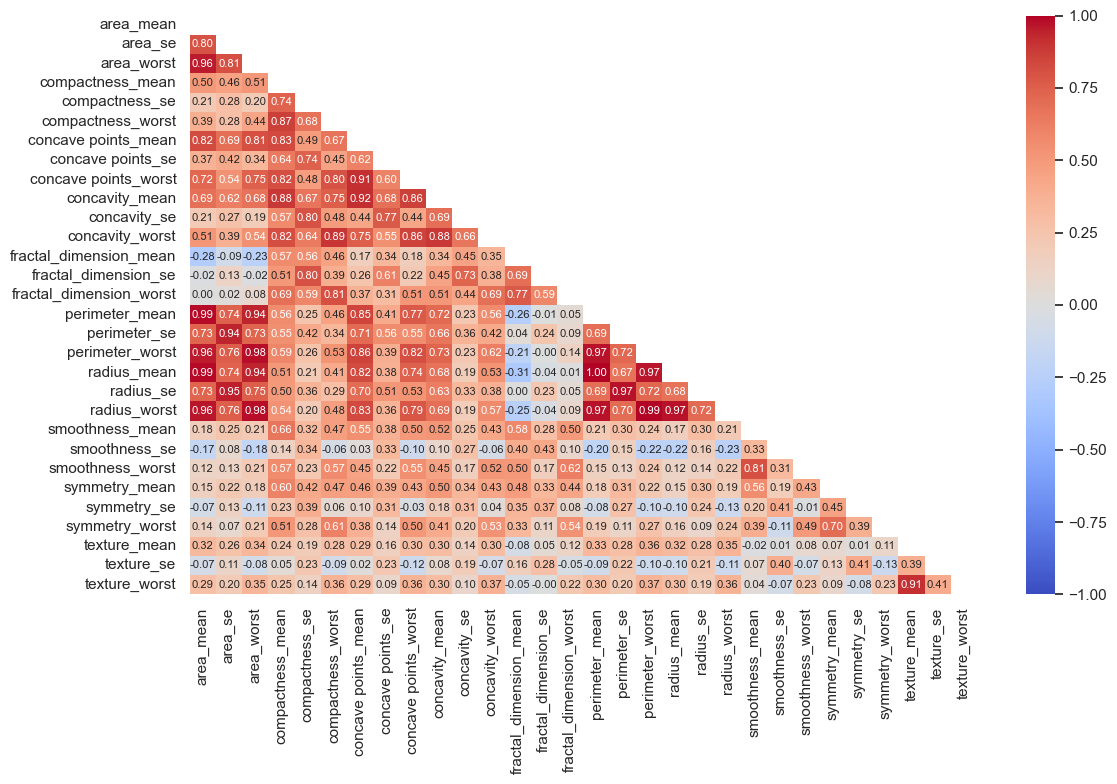

In [9]:
# Matriz de correlação de pearson
plot_correl_matrix(df, figsize=(15, 15))

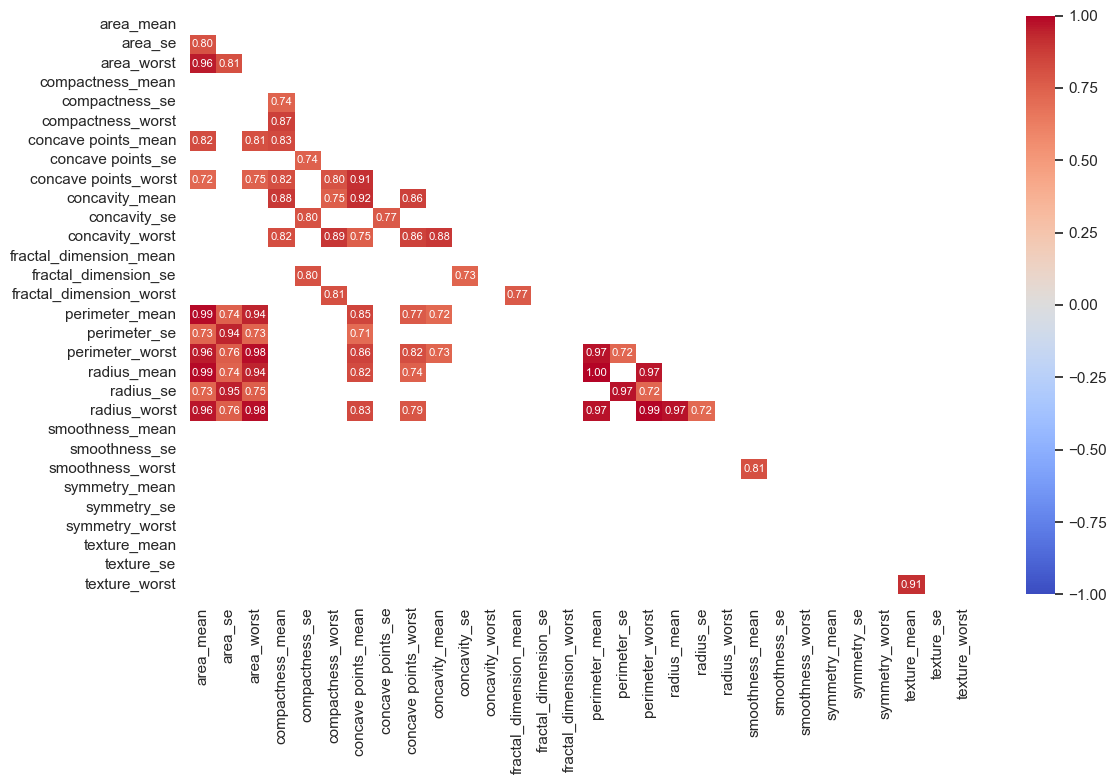

In [10]:
# Features com |correlação| >= 0,7
plot_correl_matrix(df, figsize=(15, 15), focus=0.7)

In [11]:
# Teste T de significância estatística das features
ttest_results = {}

# Classes do target
classes = df[target].unique().tolist()

# Nível de significância
alfa = 0.05

# Cálculo da estatística T
for col in col_num:
    grupo1 = df[df[target] == classes[0]][col]
    grupo2 = df[df[target] == classes[1]][col]
    
    estatistica_t, pvalue = ttest_ind(grupo1, grupo2)
    
    ttest_results[col] = {
        "p-valor": pvalue,
        "estatistica t": estatistica_t,
        "significancia": pvalue < alfa
    }

ttest_results = pd.DataFrame(ttest_results).T
ttest_results

,p-valor,estatistica t,significancia
area_mean,0.0,23.938688,True
area_se,0.0,15.609342,True
area_worst,0.0,25.72159,True
compactness_mean,0.0,17.698396,True
compactness_se,0.0,7.297077,True
compactness_worst,0.0,17.445374,True
concave points_mean,0.0,29.354314,True
concave points_se,0.0,10.642499,True
concave points_worst,0.0,31.054551,True
concavity_mean,0.0,23.103965,True


In [12]:
# Visualização das variáveis estatísticamente insignificantes
ttest_results.query('significancia == False')

,p-valor,estatistica t,significancia
fractal_dimension_mean,0.759928,-0.305723,False
fractal_dimension_se,0.063073,1.862331,False
smoothness_se,0.110297,-1.599363,False
symmetry_se,0.876645,-0.155294,False
texture_se,0.843333,-0.197723,False


In [13]:
# Salvamento dos dados tratados
df.to_csv(DADOS_TRATADOS, index=False)